In [1]:
import sys
sys.path.insert(0, '..')
import numpy as np
import pandas as pd
pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.precision', 3)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
%matplotlib inline

%load_ext autoreload
%autoreload 1

# Convex combination of two adaptive filters

### load and prepare data

In [2]:
DF = pd.read_pickle('../1608221439-df.dat')
DF

metrics                        cost                              ...        λ                            
timestep                       0      1      2      3      4     ...     2995   2996   2997   2998   2999
η fast η slow    experiment_id                                   ...                                     
0.010  1.000e-03 1608221439 0   1.0  0.998  0.995  0.994  0.992  ...    0.850  0.850  0.850  0.850  0.850
       5.000e-04 1608221439 1   1.0  0.998  0.995  0.994  0.992  ...    0.849  0.849  0.849  0.849  0.849
0.005  1.000e-03 1608221439 2   1.0  0.999  0.997  0.989  0.980  ...    0.850  0.850  0.850  0.850  0.850
       5.000e-04 1608221439 3   1.0  1.000  0.996  0.997  0.995  ...    0.850  0.850  0.850  0.850  0.850

[4 rows x 21000 columns]

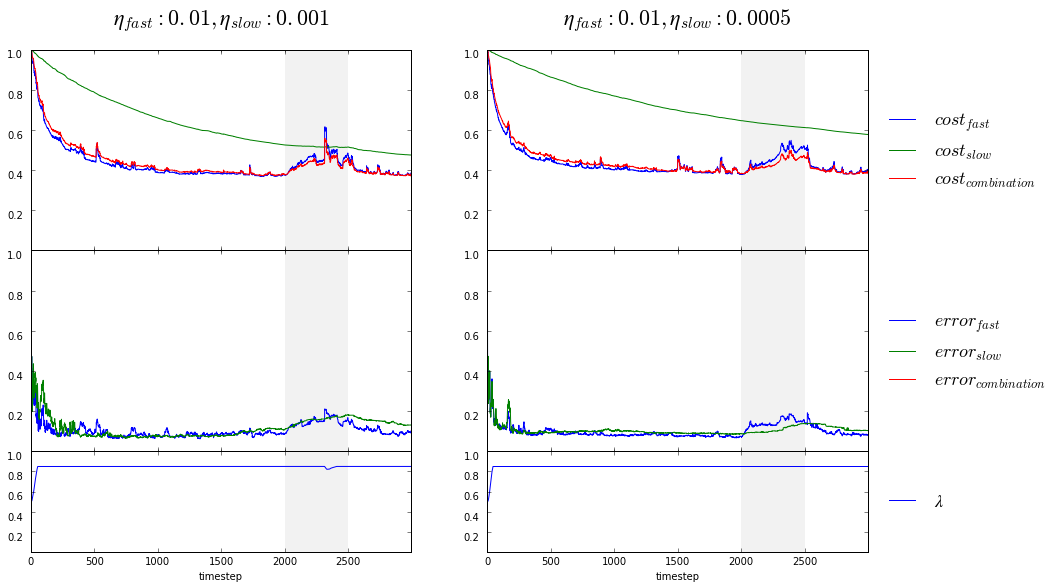

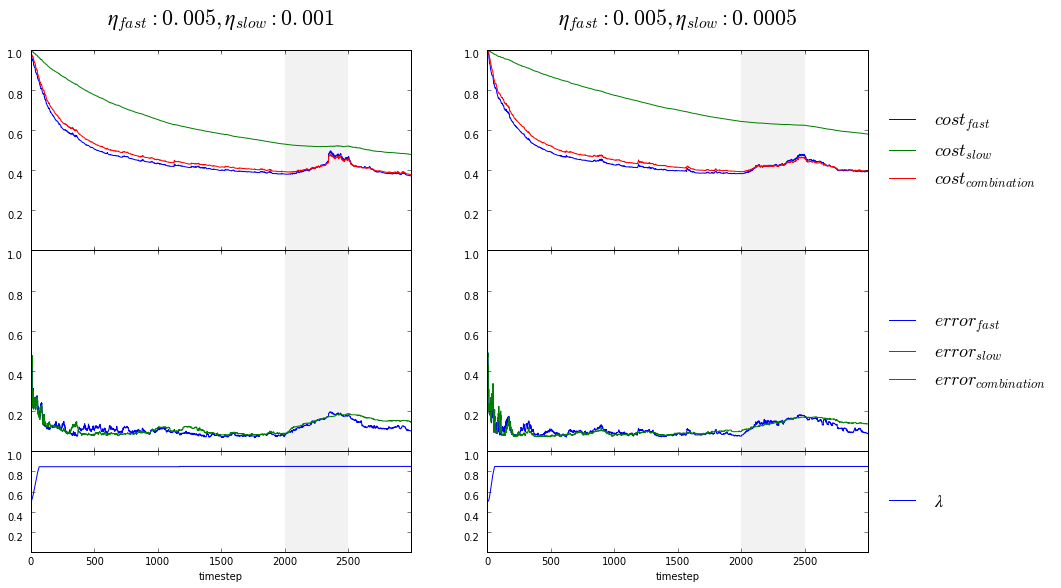

In [3]:

def chunks(lst, groups_of):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(lst), groups_of):
        yield lst[i:i + groups_of]
    
def latexify(name):
    name = '%s_{%s}' % tuple(name.split(' '))
    return name

def get_title(df):
    idx = df.index
    levels = ('%s: %s' % (latexify(name), level[label][0])
              for name, level, label in zip(idx.names, idx.levels, idx.labels))
    return ', '.join(levels)

def prepare(df):
    return df.stack('timestep').reset_index(df.index.names, drop=True)


PARAMS = {
    'sharex': True,
    'ylim': (0, 1),
    'legend': None,
}


def visualise(df, axes, idx=0, title=''):
    '''visualise 1 experiment'''

    columns = [['cost1', 'cost2', 'cost'], ['error1', 'error2', 'error'], ['λ']]
    labels  = [['cost_{fast}', 'cost_{slow}', 'cost_{combination}'],
               ['error_{fast}', 'error_{slow}', 'error_{combination}'], ['λ']]

    for ii, (metric, label) in enumerate(zip(columns, labels)):

        axis = plt.subplot(axes[ii, idx])
        axis.add_patch(patches.Rectangle((2000, 0), 500, 1, facecolor='gray', edgecolor='none', alpha=0.1))
        df.plot(x=df.index, y=metric, ax=axis, **PARAMS)

        if idx == axes._ncols-1:
            axis.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5),
                        labels=['$%s$' % l for l in label], fontsize=18)
        if ii == 0:
            plt.title('$%s$' % title, fontsize=22, y=1.1)

        axis.set_yticklabels([''] + list(np.arange(0.2, 1.2, 0.2)),
                             position=(-0.01, 0), verticalalignment='top')

    return


def compare(dfs):
    '''visualise multiple experiment'''
    fig = plt.figure(figsize=(15, 9))
    axes = gridspec.GridSpec(3, len(dfs), height_ratios=[2, 2, 1])
    axes.update(hspace=0.0)

    for idx, (df, title) in enumerate(dfs):
        visualise(df, axes, idx, title)

    plt.show()
    return



for experiment_ids in chunks(DF.index.levels[-1], groups_of=2):

    dfs = [DF.xs(experiment_id, level='experiment_id') for experiment_id in experiment_ids]
    titles = [get_title(df) for df in dfs]
    dfs = [prepare(df) for df in dfs]
    compare(list(zip(dfs, titles)))